In [10]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [67]:
import string
characters = string.ascii_uppercase
undistinct = 'CKOPSVZ'
chars = characters
for i in characters:
    if i not in undistinct:
        chars += i.lower()
print(chars)

width, height, n_len, n_class = 130, 53, 4, len(chars)
path = os.getcwd() + '/sample3'
print path

ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy
/home/z/gtest/captcha_break/sample3


In [68]:
root, dirs, files = os.walk(path).next()

In [69]:


def getAllImages(root, files):
    X = np.zeros((height, width, 1), dtype=np.uint8)
    y = []
    for i, j in enumerate(files):
        #X[i] = cv2.imread(root+'/'+j)
        img = cv2.imread(root+'/'+j)
        blur = cv2.bilateralFilter(img, 9, 75, 75)
        grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X = grayimg.reshape((height, width, 1))
        y.append(j[:4])
        yield X, y

In [70]:


def gen(root, files, batch_size=8):
    X = np.zeros((batch_size, height, width, 1), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    cnt = 0
    genimages = getAllImages(root, files)
    while True:
        for i in range(batch_size):
            try:
                allX, ally = genimages.next()
            except:
                genimages = getAllImages(root, files)
                allX, ally = genimages.next()
            X[i] = allX
            for j, ch in enumerate(ally):
                y[j][i, :] = 0
                y[j][i, chars.find(ch)] = 1
        yield X, y

In [71]:
x.shape

(53, 130, 1)

In [72]:
a = getAllImages(root, files)

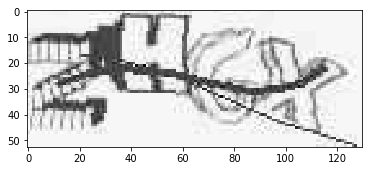

In [88]:
x, y = a.next()
plt.imshow(x.reshape((height, width)), 'gray')
plt.show()